In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

import matplotlib
matplotlib.style.use('seaborn')

from draftbot import Draft
from itertools import repeat

In [2]:
draft = Draft()
drafters = draft.draft()

In [3]:
drafter = drafters[0]

In [4]:
def make_archytype_color_mapping(alpha):
    arch_color_mapping = {
        'W': [1, 0.8, 0.5, alpha],
        'U': [0, 0, 1, alpha],
        'B': [0.2, 0.2, 0.2, alpha],
        'R': [1, 0, 0, alpha],
        'G': [0, 0.8, 0, alpha]
    }
    return arch_color_mapping

def make_archytype_colors(arch, alpha=1):
    arch_color_mapping = make_archytype_color_mapping(alpha)
    return [arch_color_mapping[c] for c in arch]

In [5]:
def plot_alternating_color_line(ax, x, y, colors):
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    segment_boundaries = np.arange(x.min(), x.max() + 1)
    n_bins = len(segment_boundaries) - 1
    cmap = ListedColormap((colors*n_bins)[:n_bins])
    norm = BoundaryNorm(segment_boundaries, cmap.N)
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(x)
    lc.set_linewidth(2)
    ax.add_collection(lc)

In [6]:
def plot_color_identity_dot(ax, x, y, color_identity, alpha=1.0):
    arch_color_mapping = make_archytype_color_mapping(alpha)
    colors = [arch_color_mapping[c] for c in color_identity]
    if len(colors) == 0:
        ax.scatter(x, y, c=['grey'], s=100, zorder=2)
    if len(colors) == 1:
        ax.scatter(x, y, c=[colors[0]], s=100, zorder=2)
    if len(colors) >= 2:
        plot_two_color_dot(ax, x, y, colors)

def plot_two_color_dot(ax, x, y, colors):
    angles = list(np.linspace(start=0, stop=2*np.pi, num=(len(colors) + 1)))
    begin_angles = angles[:-1]
    end_angles = angles[1:]
    for angle, end_angle, color in zip(begin_angles, end_angles, colors):
        xs = [0] + np.sin(np.linspace(angle, end_angle, 25)).tolist()
        ys = [0] + np.cos(np.linspace(angle, end_angle, 25)).tolist()
        xy = np.column_stack([xs, ys])
        ax.scatter(x, y, marker=(xy, 0), s=100, facecolor=color, zorder=2)

/Users/matthewdrury/anaconda3/lib/python3.7/site-packages/matplotlib/markers.py:380: MatplotlibDeprecationWarning: 
Passing vertices as `(verts, 0)` is deprecated since Matplotlib 3.0, and support for it will be removed in 3.2.  Directly pass `verts` instead.
  "3.0", "Passing vertices as `(verts, 0)` is deprecated since "


(0, 1)

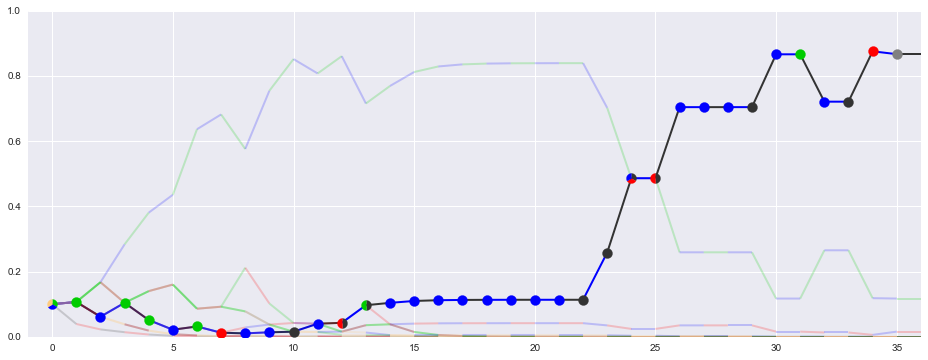

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))

history_df = pd.DataFrame(drafter._archytype_preferences_history)
history_df = pd.DataFrame(
    np.exp(history_df).values / np.exp(history_df).sum(axis=1).values.reshape(-1, 1),
    columns=history_df.columns)
card_colors = [card['colorIdentity'] for card in drafter.cards]

winning_archytype = history_df.max().idxmax()
winning_history = history_df.loc[:, winning_archytype]

colors = make_archytype_colors(winning_archytype, alpha=1.0)
plot_alternating_color_line(ax, winning_history.index.values, winning_history.values, colors)

for arch in set(history_df.columns) - set([winning_archytype]):
    arch_history = history_df.loc[:, arch]
    colors = make_archytype_colors(arch, alpha=0.2)
    plot_alternating_color_line(ax, arch_history.index.values, arch_history.values, colors)

for color_pair, x, y in zip(card_colors, winning_history.index.values, winning_history.values):
    plot_color_identity_dot(ax, x, y, color_pair)    

ax.set_xlim(-1, 36)
ax.set_ylim(0, 1)

In [9]:
history_df

,BG,BR,RG,UB,UG,UR,WB,WG,WR,WU
0,0.100000,1.000000e-01,1.000000e-01,0.100000,0.100000,0.100000,1.000000e-01,1.000000e-01,1.000000e-01,0.100000
1,0.106748,3.927030e-02,1.067477e-01,0.106748,0.106748,0.106748,1.067477e-01,1.067477e-01,1.067477e-01,0.106748
2,0.167372,2.265127e-02,1.673715e-01,0.061573,0.167372,0.061573,6.157254e-02,1.673715e-01,6.157254e-02,0.061573
3,0.104282,1.411304e-02,1.042821e-01,0.104282,0.283468,0.104282,3.836323e-02,1.042821e-01,3.836323e-02,0.104282
4,0.140009,6.970657e-03,1.400094e-01,0.051507,0.380585,0.051507,1.894821e-02,1.400094e-01,1.894821e-02,0.051507
5,0.160201,2.934175e-03,1.602005e-01,0.021681,0.435470,0.021681,7.975914e-03,1.602005e-01,7.975914e-03,0.021681
6,0.086128,1.577495e-03,8.612831e-02,0.031685,0.636407,0.031685,4.288076e-03,8.612831e-02,4.288076e-03,0.031685
7,0.092264,6.216718e-04,9.226428e-02,0.012487,0.681746,0.012487,1.689879e-03,9.226428e-02,1.689879e-03,0.012487
8,0.077928,1.427307e-03,2.118311e-01,0.010546,0.575817,0.028668,1.427307e-03,7.792831e-02,3.879822e-03,0.010546
9,0.037557,6.878856e-04,1.020913e-01,0.013817,0.754358,0.037557,6.878856e-04,3.755728e-02,1.869867e-03,0.013817


In [10]:
np.exp(history_df).values / np.exp(history_df).sum(axis=1).values.reshape(-1, 1)

array([[0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
       [0.1006568 , 0.09408882, 0.1006568 , 0.1006568 , 0.1006568 ,
        0.1006568 , 0.1006568 , 0.1006568 , 0.1006568 , 0.1006568 ],
       [0.10680005, 0.09241027, 0.10680005, 0.09607791, 0.10680005,
        0.09607791, 0.09607791, 0.10680005, 0.09607791, 0.09607791],
       [0.10017597, 0.09153847, 0.10017597, 0.10017597, 0.11983483,
        0.10017597, 0.09378543, 0.10017597, 0.09378543, 0.10017597],
       [0.10346319, 0.0905749 , 0.10346319, 0.09469991, 0.13160322,
        0.09469991, 0.09166629, 0.10346319, 0.09166629, 0.09469991],
       [0.10525328, 0.08993645, 0.10525328, 0.09163836, 0.13860654,
        0.09163836, 0.09039103, 0.10525328, 0.09039103, 0.09163836],
       [0.09674422, 0.08890067, 0.09674422, 0.09161794, 0.16772893,
        0.09161794, 0.08914197, 0.09674422, 0.08914197, 0.09161794],
       [0.09697193, 0.08848022, 0.0969719

In [11]:
np.exp(history_df).values.shape

(37, 10)

In [12]:
np.exp(history_df).sum(axis=1).values

array([11.05170918, 11.05393349, 11.06922147, 11.0796377 , 11.11781517,
       11.15163479, 11.26626714, 11.30898993, 11.23364359, 11.37961804,
       11.49395032, 11.43819017, 11.50594358, 11.34055256, 11.39651129,
       11.44754255, 11.46923233, 11.47766052, 11.48082489, 11.48199779,
       11.48243048, 11.48258982, 11.48264845, 11.35284338, 11.28017918,
       11.28017961, 11.35516906, 11.35522054, 11.35523948, 11.35524645,
       11.51882589, 11.51883031, 11.37398896, 11.37399147, 11.53167331,
       11.51943374, 11.51943374])